In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.modeling import models, fitting
import pdb
import numpy as np
import rafias_lib as rl
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Importing All Files (Full1 - Full5)

In [2]:
num = ['1', '2', '3', '4', '5']
dtype = ['481', '489']

In [3]:
#Importing a1 files
a1_files = []
for n in num:
    hdu_filenames_a1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8FULL'+n+'-*_1_'+dtype[0]+'_SE_*/*.red.fits'))
    a1_files.append(hdu_filenames_a1)
print len(a1_files), len(a1_files[0]), len(a1_files[1]), len(a1_files[2]), len(a1_files[3]), len(a1_files[4])

5 225 225 225 225 110


In [4]:
#Importing b4 files
b4_files = []
for n in num:
    hdu_filenames_b4 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'+
                              'NRCN821WLP8FULL'+n+'-*_1_'+dtype[1]+'_SE_*/*.red.fits'))
    b4_files.append(hdu_filenames_b4)
print len(b4_files), len(b4_files[0]), len(b4_files[1]), len(b4_files[2]), len(b4_files[3]), len(b4_files[4])

5 225 225 225 225 110


### Generating Centers By Doing A Gaussian Fit

In [5]:
a1_centers = []
for ds in a1_files:
    a1_centers.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True))
print len(a1_centers), len(a1_centers[0]), len(a1_centers[0][0])

5 3 225


In [6]:
b4_centers = []
for ds in b4_files:
    b4_centers.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True))
print len(b4_centers), len(b4_centers[0]), len(b4_centers[0][0])

5 3 225


### Calculating Average Residual Flux

In [7]:
a1_datas = []
b4_datas = []
av_datas = []

In [30]:
# Generating data for slope1
stdev_comparison = Table(names = ('FULL #','Stdev'))

for i,(a1c,b4c,a1,b4) in enumerate(zip(a1_centers, b4_centers, a1_files, b4_files)):
    a1_data = rl.time_series(a1c[1], a1c[2], a1, 70, 72, 80, red = True)
    b4_data = rl.time_series(b4c[1], b4c[2], b4, 70, 72, 80, red = True)
    av_data = (a1_data['res_flux'] + b4_data['res_flux'])/2
    a1_datas.append(a1_data)
    b4_datas.append(b4_data)
    av_datas.append(av_data)
    norm_res_flux = av_data[2:]/np.median(av_data[2:])
    stdev = np.std(norm_res_flux)
    stdev_comparison.add_row([num[i],stdev])

stdev_comparison

FULL #,Stdev
float64,float64
1.0,0.00151996079339
2.0,0.00170801874807
3.0,0.0019573763884
4.0,0.00135889090947
5.0,0.00122918963992


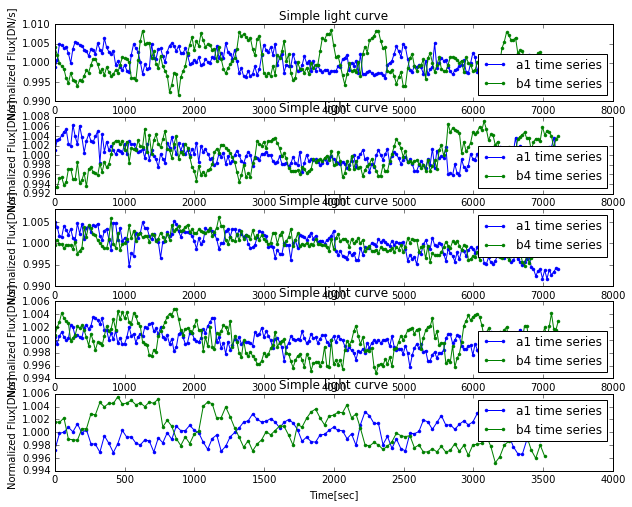

In [9]:
for index, (a1, b4) in enumerate(zip(a1_datas, b4_datas)):
    plt.subplot(5, 1, index+1)
    rl.light_curve(a1['time'], a1['res_flux'], style = '.-', lbl = 'a1 time series')
    rl.light_curve(b4['time'], b4['res_flux'], style = '.-', lbl = 'b4 time series')
    plt.legend(loc='best')

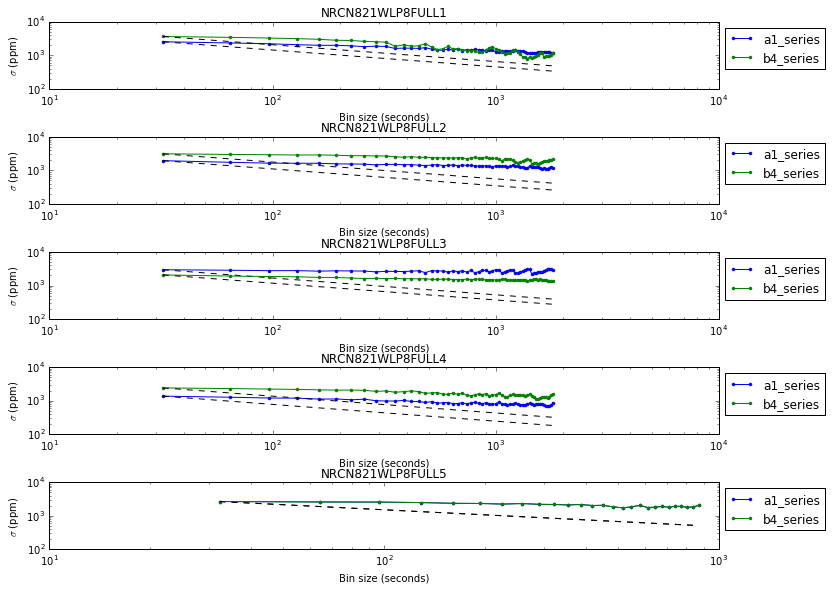

In [10]:
for index, (a1, b4) in enumerate(zip(a1_datas, b4_datas)):
    if index != 4:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(a1['time'], a1['res_flux'], 1, 57, 1, 225, '.-', 'a1_series')
        rl.rms_vs_bin(b4['time'], b4['res_flux'], 1, 57, 1, 225, '.-', 'b4_series')
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    else:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(a1['time'], b4['res_flux'], 1, 28, 1, 110, '.-', 'a1_series')
        rl.rms_vs_bin(b4['time'], b4['res_flux'], 1, 28, 1, 110, '.-', 'b4_series')
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.tight_layout(pad = 0.01)

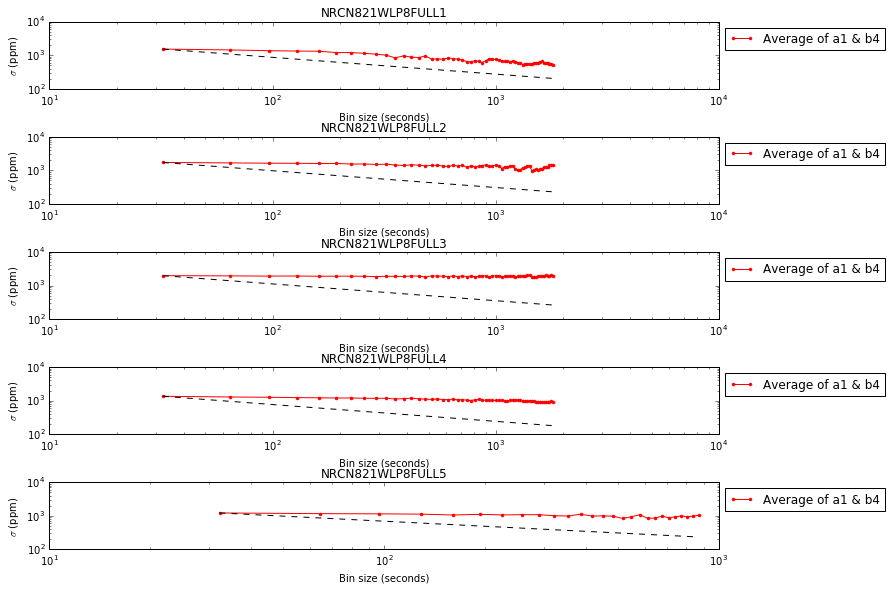

In [11]:
for index, (av, b4) in enumerate(zip(av_datas, b4_datas)):
    if index != 4:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(a1['time'], av, 1, 57, 1, 225, 'r.-', 'Average of a1 & b4')
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.title('NRCN821WLP8FULL%s' % (index+1))
    else:
        plt.subplot(5, 1, index+1)
        rl.rms_vs_bin(a1['time'], av, 1, 28, 1, 110, 'r.-', 'Average of a1 & b4')
        plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
        plt.title('NRCN821WLP8FULL%s' % (index+1))
        plt.tight_layout(pad = 0.01)

## Best data from (1 - 5)
##### Using only the image plane 2

In [12]:
centers_a15 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,a1_files[4], red = True, red2 = True)

In [13]:
centers_b45 = rl.gen_center_g2d(828,821,5,600,4,4,0,b4_files[4], red = True, red2 = True)

In [14]:
best_a1 = rl.time_series(centers_a15[1],centers_a15[2], a1_files[4], 60, 80, 90, red = True, red2 = True)
best_b4 = rl.time_series(centers_b45[1],centers_b45[2], b4_files[4], 60, 80, 90, red = True, red2 = True)
best_av = (best_a1['res_flux'] + best_b4['res_flux'])/2

In [15]:
np.std(best_av/np.median(best_av))

0.0015276542334573037

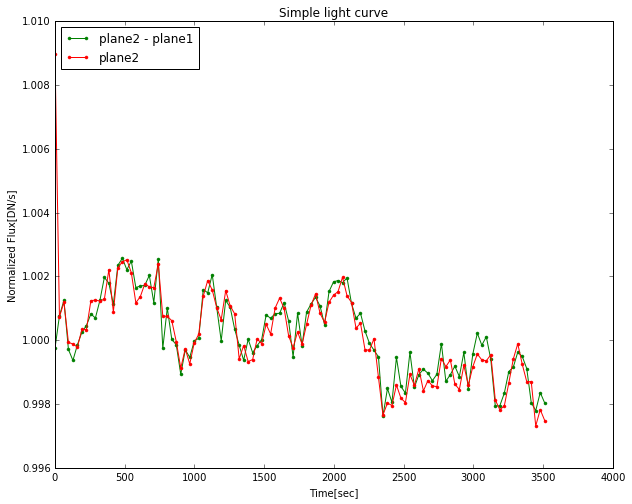

In [16]:
rl.light_curve(best_a1['time'], av_datas[4], style = 'g.-', lbl = 'plane2 - plane1')
rl.light_curve(best_a1['time'], best_av, style = 'r.-', lbl = 'plane2')
plt.legend(loc='upper left')

## Comparison Between Slopes

In [17]:
a1_datas2 = []
b4_datas2 = []
av_datas2 = []

In [18]:
a1_centers2 = []
for ds in a1_files:
    a1_centers2.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True, red2 = True))
print len(a1_centers2), len(a1_centers2[0]), len(a1_centers2[0][0])

5 3 225


In [19]:
b4_centers2 = []
for ds in b4_files:
    b4_centers2.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True, red2 = True))
print len(b4_centers2), len(b4_centers2[0]), len(b4_centers2[0][0])

5 3 225


In [29]:
# Generating data for slope1
stdev_comparison2 = Table(names = ('FULL #','Stdev'))

for i,(a1c,b4c,a1,b4) in enumerate(zip(a1_centers2, b4_centers2, a1_files, b4_files)):
    a1_data = rl.time_series(a1c[1], a1c[2], a1, 70, 72, 80, red = True, red2 = True)
    b4_data = rl.time_series(b4c[1], b4c[2], b4, 70, 72, 80, red = True, red2 = True)
    av_data = (a1_data['res_flux'] + b4_data['res_flux'])/2
    a1_datas2.append(a1_data)
    b4_datas2.append(b4_data)
    av_datas2.append(av_data)
    norm_res_flux = av_data[2:]/np.median(av_data[2:])
    stdev = np.std(norm_res_flux)
    stdev_comparison2.add_row([num[i],stdev])

stdev_comparison2

FULL #,Stdev
float64,float64
1.0,0.00148836984491
2.0,0.00171741058802
3.0,0.00205508596214
4.0,0.00135270632517
5.0,0.00122907566864


ValueError: num must be 1 <= num <= 5, not 6

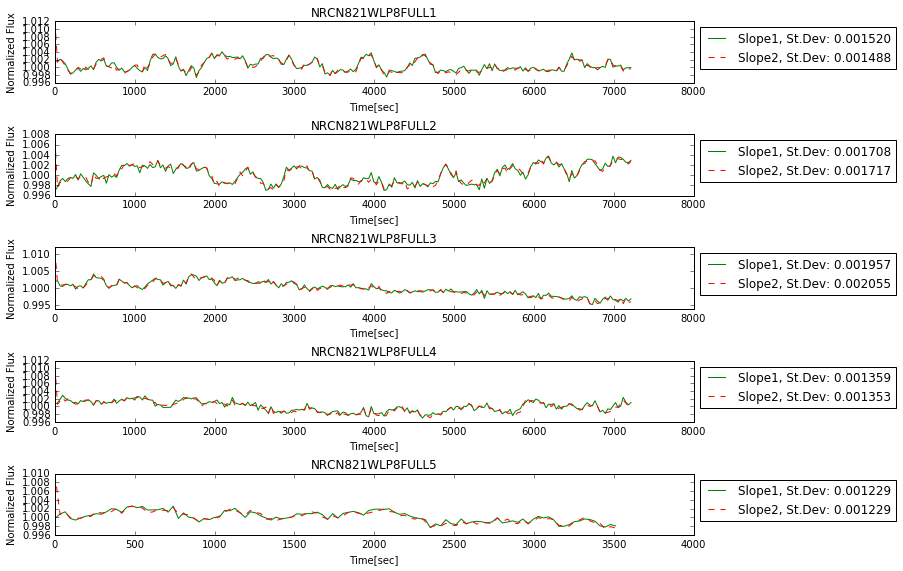

In [31]:
std1 = stdev_comparison['Stdev']
std2 = stdev_comparison2['Stdev']

for index, (s1, s2) in enumerate(zip(av_datas, av_datas2)):
    plt.subplot(5, 1, index+1)
    rl.light_curve(a1_datas[index]['time'], s1, style = 'g-', lbl = 'Slope1, St.Dev: %f' % std1[index])
    rl.light_curve(a1_datas[index]['time'], s2, style = 'r--', lbl = 'Slope2, St.Dev: %f' % std2[index])
    plt.ylabel('Normalized Flux')
    plt.title('NRCN821WLP8FULL%s' % (index+1))
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor = (1,1))

In [ ]:
# slope1 = (Plane2 - Plane1)/Tgroup
# slope2 = Plane2/Tgroup
slope_comparison = Table()
slope_comparison['Index'] = [1,2,3,4,5]
slope_comparison['Slope1'] = stdev_comparison['Stdev']
slope_comparison['Slope2'] = stdev_comparison2['Stdev']
slope_comparison


## Calculating Errors For Each Case

In [ ]:
# Slope1
med_err = []
for index, data in enumerate(data_sets):
    a1_error = rl.norm_flux_error(data['res_flux'], 2.2, a1, red = True)
    b4_error = rl.norm_flux_error(data['res_flux'], 2.5, b4, red = True)
    average_err_array = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    median_err = np.median(average_err_array)
    med_err.append(median_err)
med_err

In [ ]:
# Slope2
med_err2 = []
for index, data in enumerate(s2_data_sets):
    a1_error = rl.norm_flux_error(data['res_flux'], 2.2, a1, red = True, red2 = True)
    b4_error = rl.norm_flux_error(data['res_flux'], 2.5, b4, red = True, red2 = True)
    average_err_array = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    median_err = np.median(average_err_array)
    med_err2.append(median_err)
med_err2

In [ ]:
# slope1 = (Plane2 - Plane1)/Tgroup
# slope2 = Plane2/Tgroup
error_comparison = Table()
error_comparison['Index'] = [1,2,3,4,5]
error_comparison['error1'] = med_err
error_comparison['error2'] = med_err2
error_comparison